In [1]:
import graphlab


In [2]:
sales = graphlab.SFrame('kc_house_data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\chinesh\AppData\Local\Temp\graphlab_server_1475582765.log.0


This non-commercial license of GraphLab Create for academic use is assigned to 15bit116@ietdavv.edu.in and will expire on September 10, 2017.


In [3]:
sales = sales.sort(['sqft_living','price'])

In [50]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    
    poly_sframe = graphlab.SFrame()
    poly_sframe['power_1']=feature
    # and set poly_sframe['power_1'] equal to the passed feature
    
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            poly_sframe[name] = feature**power
            # assign poly_sframe[name] to be feature^power
            
    return poly_sframe

In [51]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)


In [52]:
poly1_data['price'] = sales['price']


In [53]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.020059     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

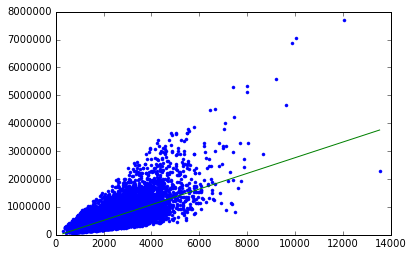

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data),'-')

In [56]:
sales.show()


Canvas is accessible via web browser at the URL: http://localhost:62974/index.html
Opening Canvas in default web browser.


In [57]:
poly1_data['bedrooms'] = sales['bedrooms']

In [72]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names()
print my_features

['power_1', 'power_2']


In [75]:
poly2_data['price'] = sales['price']


In [77]:
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.006001     | 5913020.984255     | 250948.368758 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

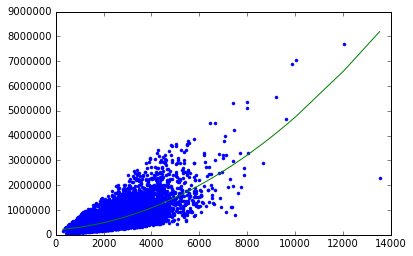

In [81]:
plt.plot(poly2_data['power_1'],poly2_data[my_features],'.',
poly2_data['power_1'], model2.predict(poly2_data),'-')

In [82]:

poly1_data = polynomial_sframe(sales['sqft_living'], 15)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000000     | 6624758.672523     | 366503.484839 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

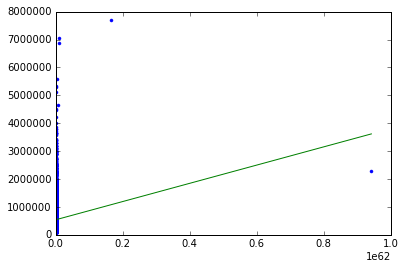

In [83]:
model2 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_15'], validation_set = None)
plt.plot(poly1_data['power_15'],poly1_data['price'],'.',
        poly1_data['power_15'], model2.predict(poly1_data),'-')

In [85]:
model1.get('coefficients')

name,index,value,stderr
(intercept),None,-43579.0852514,4402.68969743
power_1,None,280.622770886,1.93639855513


In [86]:
model2.get('coefficients')

name,index,value,stderr
(intercept),None,539916.011822,2493.18744516
power_15,None,3.26446546166e-56,3.83091283692e-57


In [87]:
temp_set, temp_set_plus = sales.random_split(.5,seed=0)
set_1, set_2 = temp_set.random_split(.5,seed=0)
set_3, set_4 = temp_set_plus.random_split(.5,seed=0)

In [88]:
poly_data = polynomial_sframe(set_1['sqft_living'], 15)
poly_data['price'] = set_1['price'] # add price to the data since it's the target
model = graphlab.linear_regression.create(poly_data, target = 'price', features = ['power_15'], validation_set = None)
model.get("coefficients")

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000000     | 6649309.933131     | 389290.208472 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

name,index,value,stderr
(intercept),None,546048.078681,5297.24780926
power_15,None,3.07735556823e-56,4.0705345523e-57


Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000000     | 3449803.032238     | 338169.369522 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

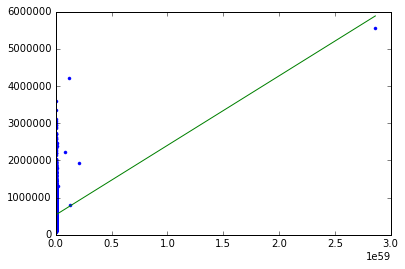

In [89]:

poly_data = polynomial_sframe(set_2['sqft_living'], 15)
poly_data['price'] = set_2['price'] # add price to the data since it's the target
model = graphlab.linear_regression.create(poly_data, target = 'price', features = ['power_15'], validation_set = None)
model.get("coefficients")
plt.plot(poly_data['power_15'],poly_data['price'],'.',
        poly_data['power_15'], model.predict(poly_data),'-')

In [90]:
model.get("coefficients")

name,index,value,stderr
(intercept),None,536958.184414,4604.24979271
power_15,None,1.86752845737e-53,1.17565594161e-54


In [94]:

sales = sales.sort(['sqft_living', 'price'])
training_and_validation, testing = sales.random_split(.9,seed=1)
training, validation = training_and_validation.random_split(.5,seed=1)
print len(training)
print len(validation)


9761
9635


"sales - sales.sort(['sqft_living','price'])\ntraining_and_validation , testing = sales.random_split(.9,seed=1)\ntraining,validation = training_and_validation.random_split(.5,seed=1)\nprint len(training)\nprint len(validation)"

In [102]:
for i in range(1,4):
    poly_data = polynomial_sframe(set_2['sqft_living'], 15)
    string = 'set_'
    poly_data['price'] = (string += 'i')['price'] # add price to the data since it's the target
    model = graphlab.linear_regression.create(poly_data, target = 'price', features = ['power_15'], validation_set = None)
    model.get("coefficients")
    plt.plot(poly_data['power_15'],poly_data['price'],'.',poly_data['power_15'], model.predict(poly_data),'-')

SyntaxError: invalid syntax (<ipython-input-102-10850d7866c6>, line 4)